##**Project Requirement:**

Analyzing and Forecasting Unemployment Rates During Covid-19 in India
Objective: This project explores how Covid-19 impacted employment in India, focusing on changes in unemployment rates since 2020, with a forecast to anticipate future trends.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/unemployment_data.csv')
df.head(100)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural
...,...,...,...,...,...,...,...
95,Haryana,30-06-2019,Monthly,23.08,4745178,45.23,Rural
96,Haryana,31-07-2019,Monthly,16.22,4826560,42.17,Rural
97,Haryana,31-08-2019,Monthly,30.94,4558306,48.23,Rural
98,Haryana,30-09-2019,Monthly,16.36,5127956,44.72,Rural


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    int64  
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


In [7]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [10]:
df.columns = df.columns.str.strip()

In [11]:
# Strip whitespaces in the 'Date' column and convert to datetime
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%d-%m-%Y')

In [12]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural


In [13]:
# Summary statistics for key columns
print(df[['Estimated Unemployment Rate (%)',
                    'Estimated Employed',
                    'Estimated Labour Participation Rate (%)']].describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


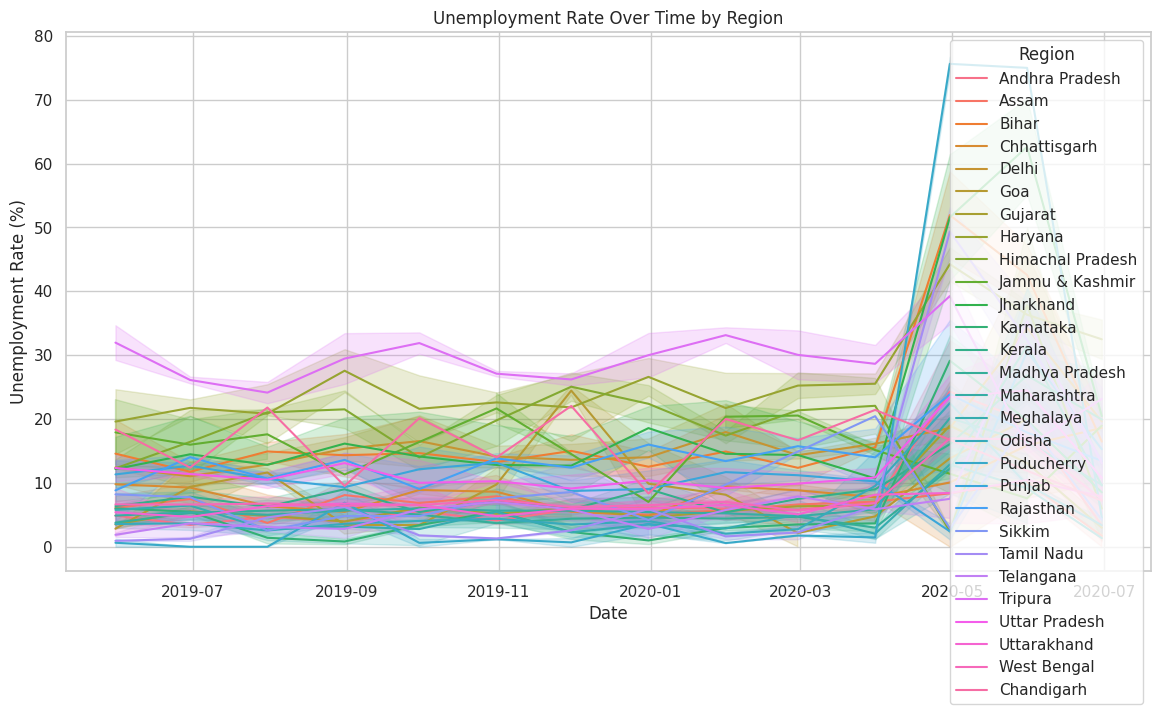

In [14]:


# Set the style
sns.set(style="whitegrid")

# Plot the unemployment rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(title='Region')
plt.show()


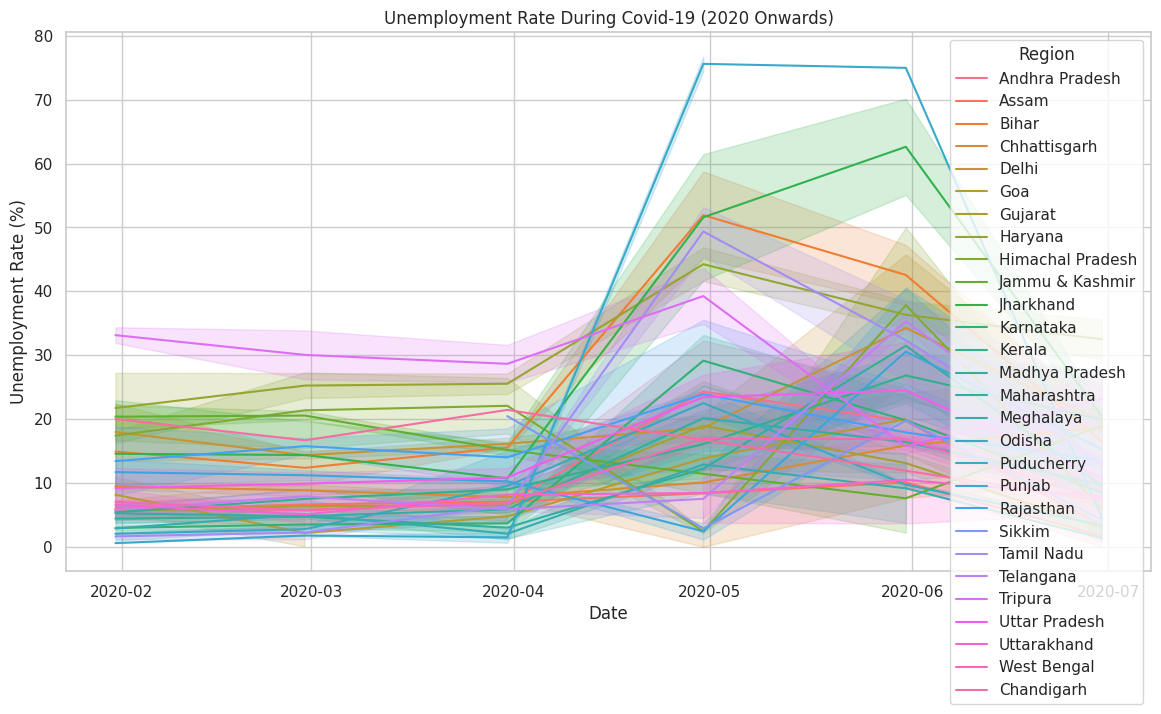

In [15]:
# Filter data from 2020 onward
covid_data = df[df['Date'] >= '2020-01-01']

plt.figure(figsize=(14, 7))
sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate During Covid-19 (2020 Onwards)')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(title='Region')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2020-07-31    3.764026
2020-08-31    4.768721
2020-09-30    5.115118
2020-10-31    5.234549
2020-11-30    5.275726
2020-12-31    5.289923
2021-01-31    5.294818
2021-02-28    5.296505
2021-03-31    5.297087
2021-04-30    5.297288
2021-05-31    5.297357
2021-06-30    5.297381
Freq: ME, Name: predicted_mean, dtype: float64


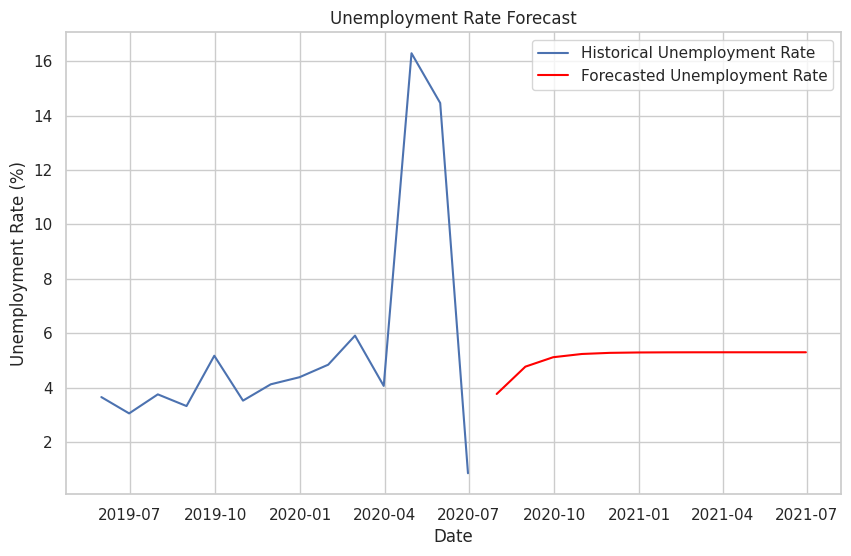

In [18]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load data and prepare it
data = pd.read_csv('/content/unemployment_data.csv')
data['Date'] = pd.to_datetime(data['Date'].str.strip(), format='%d-%m-%Y')
data.set_index('Date', inplace=True)

# Remove duplicate dates by averaging values for each day
data = data[~data.index.duplicated(keep='first')]

# Set a monthly frequency ('ME' for monthly end)
data = data.asfreq('ME')

# ARIMA model fitting
model = ARIMA(data['Estimated Unemployment Rate (%)'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Print forecasted values
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Estimated Unemployment Rate (%)'], label='Historical Unemployment Rate')
plt.plot(forecast, label='Forecasted Unemployment Rate', color='red')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Forecast')
plt.legend()
plt.show()


##**Project Requirement:**

Analyzing and Forecasting Unemployment Rates During Covid-19 in India
Objective: This project explores how Covid-19 impacted employment in India, focusing on changes in unemployment rates since 2020, with a forecast to anticipate future trends.

###**Steps and Analysis:**

**Data Collection and Cleaning:**

We began by loading and cleaning the dataset, addressing any missing values and duplicates. The date column was converted to a standard format and indexed by month, ensuring smooth time-series analysis.

###**Exploratory Analysis:**

Through descriptive statistics and visualizations, we analyzed the overall trends in unemployment. This showed significant fluctuations in unemployment rates, with noticeable impacts in 2020 due to Covid-19.

###**Covid-19 Impact Analysis:**

We filtered the data from 2020 onwards to focus specifically on the pandemic period, observing a clear rise in unemployment rates in 2020, which eventually stabilized but remained elevated.

###**Forecasting Unemployment Trends:**

Using an ARIMA model, we forecasted the unemployment rate over the next 12 months. This forecast predicts a slow but steady stabilization, reflecting a gradual economic recovery.

#**Conclusion:**

###The analysis revealed a significant increase in unemployment in 2020 due to Covid-19. The forecast suggests that while unemployment rates are stabilizing, the recovery is gradual. This project demonstrates how data analysis and forecasting can be applied to assess economic impacts and inform recovery planning.

